In [ ]:
import numpy as np
from numpy import linalg as LA
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [1]:
# Store 2D data array
df = pd.read_csv('examplecsv.csv')
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 4', 'Unnamed: 5'])
raw_data = df.to_numpy()
print(raw_data)

data_size = len(raw_data) # Number of data points
data_dim = len(raw_data[0]) # Dimension of each data point
print(data_size)
print(data_dim)

[[ 1.23e+02  1.23e+02  2.00e-01]
 [ 2.99e+02  4.20e+01 -2.00e-01]
 [ 5.70e+01  7.90e+01  1.00e-02]
 [ 6.70e+01  1.49e+02  3.00e-01]
 [ 4.30e+01  2.04e+02 -5.00e-01]
 [ 1.55e+02  5.00e+01 -1.00e-01]
 [ 2.30e+02  2.53e+02 -3.20e-01]
 [ 1.50e+01  1.33e+02  0.00e+00]]


In [3]:
# Raw scores to deviation scores (standardize)
ones = np.ones((data_size, data_size))
interm_1 = ones.dot(raw_data)
#print interm_1
interm_2 = np.multiply( interm_1 , (1.0/data_size) )
#print interm_2
standardized_data = np.subtract( raw_data, interm_2 )
print standardized_data

[[-6.25000e-01 -6.12500e+00  2.76250e-01]
 [ 1.75375e+02 -8.71250e+01 -1.23750e-01]
 [-6.66250e+01 -5.01250e+01  8.62500e-02]
 [-5.66250e+01  1.98750e+01  3.76250e-01]
 [-8.06250e+01  7.48750e+01 -4.23750e-01]
 [ 3.13750e+01 -7.91250e+01 -2.37500e-02]
 [ 1.06375e+02  1.23875e+02 -2.43750e-01]
 [-1.08625e+02  3.87500e+00  7.62500e-02]]


In [4]:
# Get covariance matrix
cov = (standardized_data.transpose()).dot(standardized_data)
cov = np.multiply(cov, (1.0/data_size))
print cov

[[ 8.62523438e+03 -1.10307812e+03 -6.21484375e+00]
 [-1.10307812e+03  4.72035938e+03 -5.93796875e+00]
 [-6.21484375e+00 -5.93796875e+00  6.07484375e-02]]


In [5]:
# Make dictionary for eigensystem of covariance matrix
eigval, eigvec = LA.eig(cov)
print eigval
print eigvec

eigsys = {}
for i in range(len(eigval)):
    eigsys[eigval[i]] = eigvec[i]

print eigsys

[8.91529631e+03 4.43031181e+03 4.63712425e-02]
[[ 9.67122952e-01 -2.54307629e-01  9.08579743e-04]
 [-2.54308751e-01 -9.67121966e-01  1.47028265e-03]
 [-5.04803332e-04  1.65300388e-03  9.99998506e-01]]
{4430.3118139717535: array([-0.25430875, -0.96712197,  0.00147028]), 0.04637124245054769: array([-5.04803332e-04,  1.65300388e-03,  9.99998506e-01]), 8915.296313223298: array([ 9.67122952e-01, -2.54307629e-01,  9.08579743e-04])}


In [6]:
# Get principal components
def principal_comp(num_comp, eigsys):
    eigvals = eigsys.keys()
    eigvals.sort()
    components = range(num_comp)
    for i in range(num_comp):
        components[i] = eigvals[len(eigvals) - i - 1]
    return components

# DECLARE NUMBER OF COMPONENTS
num_comp = 2
principal_values = principal_comp(num_comp, eigsys)
print principal_values

[8915.296313223298, 4430.3118139717535]


In [7]:
# Make feature vectors matrix and transpose
feature_matrix = range(num_comp)
for i in range(num_comp):
    feature_matrix[i] = eigsys[principal_values[i]]

feature_matrix = np.asarray(feature_matrix)

proj_data = np.dot(feature_matrix, standardized_data.transpose())

print proj_data

[[   0.95343338  191.76562746  -51.68731839  -59.81735943  -97.01595676
    50.46555221   71.37512496 -106.03910344]
 [   6.08297118   39.66092207   65.42043592   -4.82076283  -51.91023716
    68.54455357 -146.85468536   23.87680261]]


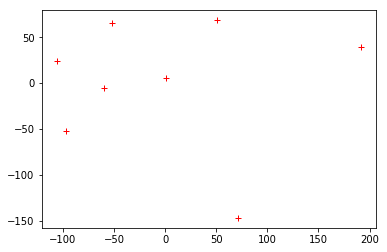

In [8]:
# Graph 2D data
plt.figure()
plt.plot(proj_data[0], proj_data[1], 'r+')
plt.show()